In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


In [2]:


# data_path = 'data/features.csv'
data_path = 'data/features_2.csv'
data = pd.read_csv(data_path)


In [3]:
data = data.drop('image_name', axis=1)
data.head()

,emotion,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_990,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999
0,anger,-3.374050,-4.201500,-1.379432,-1.991517,-0.879160,-0.236515,-1.020453,-2.756259,-2.090019,...,1.420132,-0.417811,1.790014,-0.974268,2.277266,2.825337,-0.945226,0.245493,-0.412888,0.417821
1,anger,-3.142779,-3.272339,-0.473411,-1.034305,-0.898905,0.387357,-0.372573,-3.333039,-2.484318,...,2.020956,1.156134,1.527367,-1.293098,2.071792,2.398509,-0.801370,-0.037821,-0.246707,0.960680
2,anger,-3.862835,-4.736306,-0.013016,-0.386987,-0.423331,-0.480952,-0.987659,-2.637403,-0.946556,...,1.355216,0.209859,0.901910,-1.859188,2.111249,2.153092,-1.806323,-0.221707,-1.277875,1.197531
3,anger,-3.949094,-3.904554,-2.408397,-2.448137,-1.744148,-0.184783,-0.181279,-3.197289,-1.698156,...,0.557256,-0.350272,0.843501,-2.037556,2.019527,1.740942,-1.879538,-0.133855,-0.720962,1.173536
4,anger,-3.586210,-4.171683,-1.484649,-2.201640,-0.376721,0.586027,-0.199893,-1.341736,-0.172441,...,0.655409,-0.542305,0.847469,0.598680,2.108732,2.468873,-1.044443,0.232312,-0.433584,1.562649


In [4]:
X = data.iloc[:, 1:]
y = data.iloc[:,0]

In [5]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


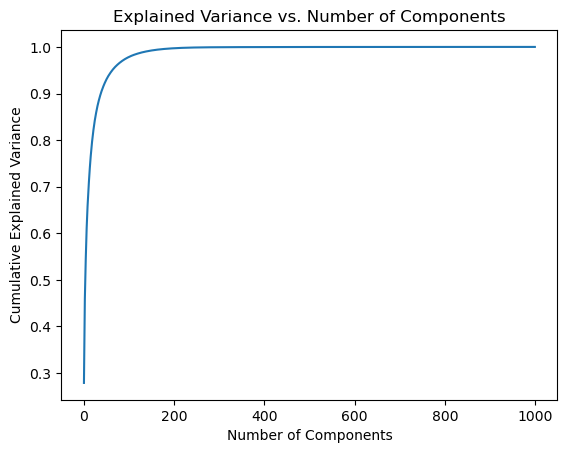

In [7]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()


In [ ]:
pca = PCA(n_components=25)  # Choose the number of components to keep

X_train_pca = pca.fit_transform(X_res)
X_test_pca = pca.fit_transform(X_test)


# Step 5: Transform the Data
print(f"Original shape: {X_res.shape}")
print(f"Transformed shape: {X_train_pca.shape}")


Explained variance ratio: [0.2205372  0.09144687 0.08249894 0.04798406 0.04398967 0.03834259
 0.03228973 0.02854817 0.02331689 0.02187802]
Cumulative explained variance: [0.2205372  0.31198406 0.394483   0.44246706 0.48645673 0.52479931
 0.55708904 0.58563721 0.60895411 0.63083213]


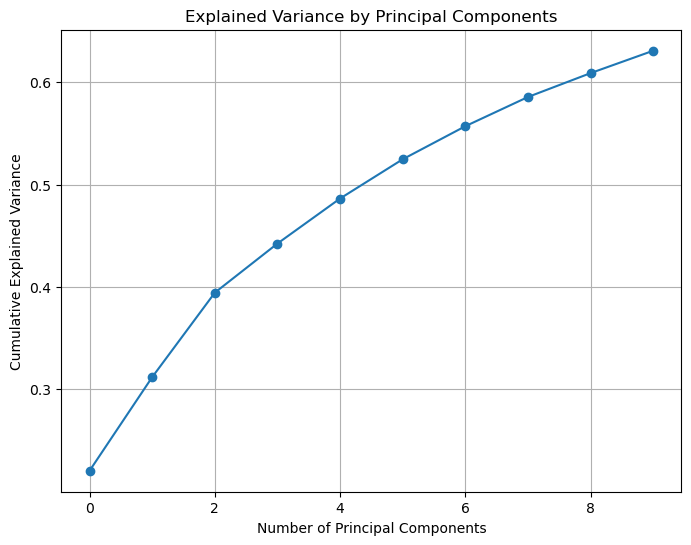

In [5]:


# Perform PCA
n_components = 10  # Number of principal components to keep
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()




In [6]:
# If you need to save the PCA-transformed data to a CSV file
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df.to_csv('pca_transformed_data_2.csv', index=False)
print("PCA-transformed data saved to 'pca_transformed_data.csv'")

PCA-transformed data saved to 'pca_transformed_data.csv'


In [7]:
X = pca_df

In [8]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [9]:
# Initialize the QDA model
qda = QuadraticDiscriminantAnalysis()

# Fit the model to the training data
qda.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = qda.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.32


In [10]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose 'linear', 'rbf', etc.

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.31
